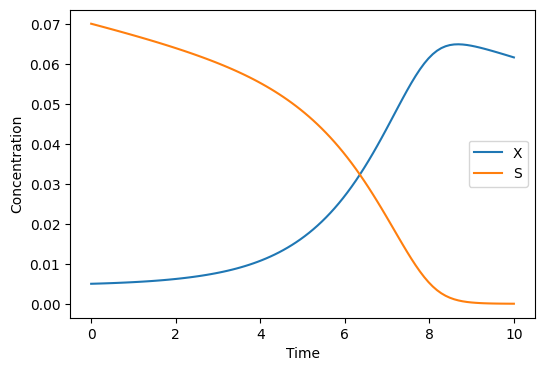

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint


# Define the ODE system
def ode_func(t, y):
    # y: array of dependent variables
    # Define the ODEs here
    X = y[0]
    S = y[1]
    mu_max = 0.77
    Ks = 0.85
    Y_XS = 0.213
    kd = 0.0
    mu = mu_max * S / (S + Ks)
    dydt = [mu * X - kd, -1/Y_XS * mu * X]
    return dydt


# Set initial conditions
y0 = [0.005, 0.07]

# Set the time grid
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODE system
sol = solve_ivp(ode_func, t_span, y0, method='RK45', t_eval=t_eval)

# Plot the results
plt.figure(figsize=(6,4))
plt.plot(sol.t, sol.y[0], label='X')
plt.plot(sol.t, sol.y[1], label='S')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()